In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
from sklearn.svm import SVC, LinearSVC

In [8]:
train = pd.read_csv(r'C:\Users\Abhishek\Documents\Data analyst\Practical exam\Data Set for ML & R Practical Exam Paper_1979\bank-additional-full.csv')

In [7]:
train.shape

(41188, 21)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot: ylabel='Frequency'>

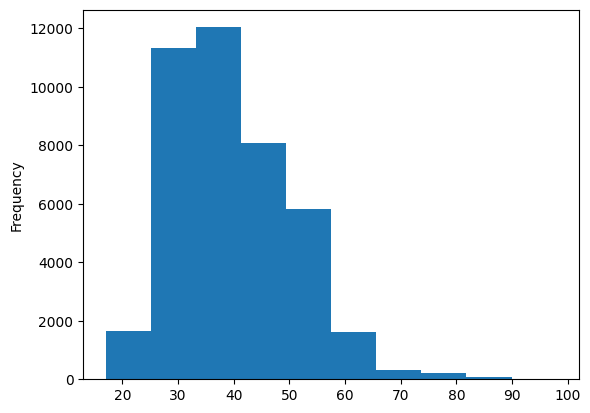

In [12]:
train['age'].plot.hist()

<AxesSubplot: xlabel='age'>

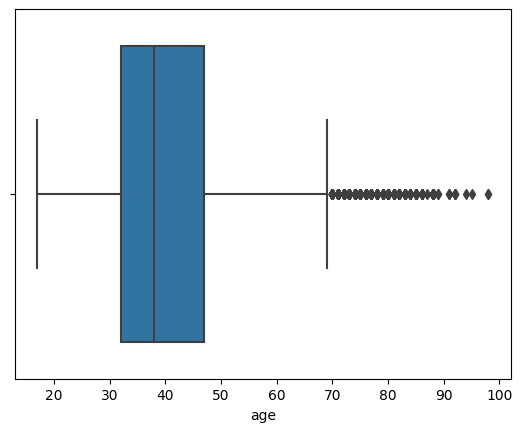

In [13]:
sns.boxplot(x='age',data=train)

In [14]:
len(train[train['age']>67])

536

In [15]:
mask = train.age >67
train.loc[mask,'age'] = 67

In [17]:
train[train['age']==67]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,67,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,...,3,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,yes
27757,67,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27774,67,retired,single,university.degree,no,yes,yes,cellular,mar,mon,...,22,999,0,nonexistent,-1.8,92.843,-50.0,1.703,5099.1,no
27780,67,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
27800,67,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40996,67,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41004,67,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes
41153,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,...,2,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,yes
41183,67,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<AxesSubplot: ylabel='Frequency'>

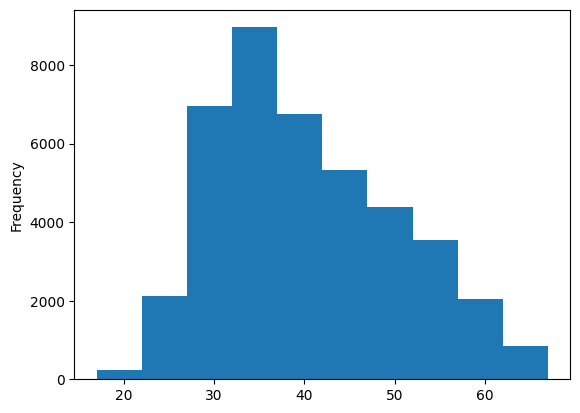

In [18]:
train['age'].plot.hist()

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
train['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [22]:
pd.crosstab(train.education,train.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
basic.4y,77,2318,137,474,100,597,93,132,26,58,112,52
basic.6y,151,1426,71,77,85,75,25,226,13,87,34,22
basic.9y,499,3623,210,94,166,145,220,388,99,384,186,31
high.school,3329,878,234,174,298,276,118,2682,357,873,259,37
illiterate,1,8,2,1,0,3,3,0,0,0,0,0
professional.course,363,453,135,59,89,241,168,218,43,3320,142,12
university.degree,5753,94,610,139,2063,285,765,173,170,1809,262,45
unknown,249,454,57,42,123,98,29,150,167,212,19,131


In [24]:
train['job'].replace('unknown','unemployed',inplace=True)

In [25]:
train['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
unemployed        1344
housemaid         1060
student            875
Name: job, dtype: int64

In [58]:
train['job'].replace('admin.',0,inplace=True)
train['job'].replace('blue-collar',1,inplace=True)
train['job'].replace('technician',2,inplace=True)
train['job'].replace('services',3,inplace=True)
train['job'].replace('management',4,inplace=True)
train['job'].replace('retired',5,inplace=True)
train['job'].replace('entrepreneur',6,inplace=True)
train['job'].replace('self-employed',7,inplace=True)
train['job'].replace('unemployed',8,inplace=True)
train['job'].replace('housemaid',9,inplace=True)
train['job'].replace('student',10,inplace=True)

In [59]:
train['job'].value_counts()

0     10422
1      9254
2      6743
3      3969
4      2924
5      1720
6      1456
7      1421
8      1344
9      1060
10      875
Name: job, dtype: int64

In [33]:
train['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [34]:
train['marital'].replace('married',0,inplace=True)
train['marital'].replace('single',1,inplace=True)
train['marital'].replace('divorced',2,inplace=True)
train['marital'].replace('unknown',3,inplace=True)
train['marital'].value_counts()

0    24928
1    11568
2     4612
3       80
Name: marital, dtype: int64

In [35]:
train['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [36]:
train['education'].replace('university.degree',0,inplace=True)
train['education'].replace('high.school',1,inplace=True)
train['education'].replace('basic.9y',2,inplace=True)
train['education'].replace('professional.course',3,inplace=True)
train['education'].replace('basic.4y',4,inplace=True)
train['education'].replace('basic.6y',5,inplace=True)
train['education'].replace('unknown',6,inplace=True)
train['education'].replace('illiterate',7,inplace=True)
train['education'].value_counts()

0    12168
1     9515
2     6045
3     5243
4     4176
5     2292
6     1731
7       18
Name: education, dtype: int64

In [38]:
train['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [39]:
train['default'].replace('no',0,inplace=True)
train['default'].replace('unknown',1,inplace=True)
train['default'].replace('yes',2,inplace=True)
train['default'].value_counts()

0    32588
1     8597
2        3
Name: default, dtype: int64

In [40]:
train['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [41]:
train['housing'].replace('yes',0,inplace=True)
train['housing'].replace('no',1,inplace=True)
train['housing'].replace('unknown',2,inplace=True)
train['housing'].value_counts()

0    21576
1    18622
2      990
Name: housing, dtype: int64

In [42]:
train['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [43]:
train['loan'].replace('yes',0,inplace=True)
train['loan'].replace('no',1,inplace=True)
train['loan'].replace('unknown',2,inplace=True)
train['loan'].value_counts()

1    33950
0     6248
2      990
Name: loan, dtype: int64

In [44]:
train['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [45]:
train['contact'].replace('cellular',0,inplace=True)
train['contact'].replace('telephone',1,inplace=True)
train['contact'].value_counts()

0    26144
1    15044
Name: contact, dtype: int64

In [46]:
train['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [47]:
train['month'].replace('jan',1,inplace=True)
train['month'].replace('feb',2,inplace=True)
train['month'].replace('mar',3,inplace=True)
train['month'].replace('apr',4,inplace=True)
train['month'].replace('may',5,inplace=True)
train['month'].replace('jun',6,inplace=True)

train['month'].replace('jul',7,inplace=True)
train['month'].replace('aug',8,inplace=True)
train['month'].replace('sep',9,inplace=True)

train['month'].replace('oct',10,inplace=True)
train['month'].replace('nov',11,inplace=True)
train['month'].replace('dec',12,inplace=True)



train['month'].value_counts() 

5     13769
7      7174
8      6178
6      5318
11     4101
4      2632
10      718
9       570
3       546
12      182
Name: month, dtype: int64

In [48]:
train['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [49]:
train['day_of_week'].replace('mon',1,inplace=True)
train['day_of_week'].replace('tue',2,inplace=True)
train['day_of_week'].replace('wed',3,inplace=True)
train['day_of_week'].replace('thu',4,inplace=True)
train['day_of_week'].replace('fri',5,inplace=True)
train['day_of_week'].value_counts()

4    8623
1    8514
3    8134
2    8090
5    7827
Name: day_of_week, dtype: int64

In [50]:
train['poutcome'].value_counts()    

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [53]:
train['poutcome'].replace('nonexistent',1,inplace=True)
train['poutcome'].replace('failure',1,inplace=True)
train['poutcome'].replace('success',2,inplace=True)
train['poutcome'].value_counts()    

1    35563
2     4252
3     1373
Name: poutcome, dtype: int64

In [54]:
train['poutcome'].value_counts()    

1    35563
2     4252
3     1373
Name: poutcome, dtype: int64

In [55]:
train['y'].value_counts()    

no     36548
yes     4640
Name: y, dtype: int64

In [56]:
train['y'].replace('no',0,inplace=True)
train['y'].replace('yes',1,inplace=True)
train['y'].value_counts()    

0    36548
1     4640
Name: y, dtype: int64

In [60]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,9,0,4,0,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3,0,1,1,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3,0,1,0,0,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,5,0,1,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3,0,1,0,1,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot: >

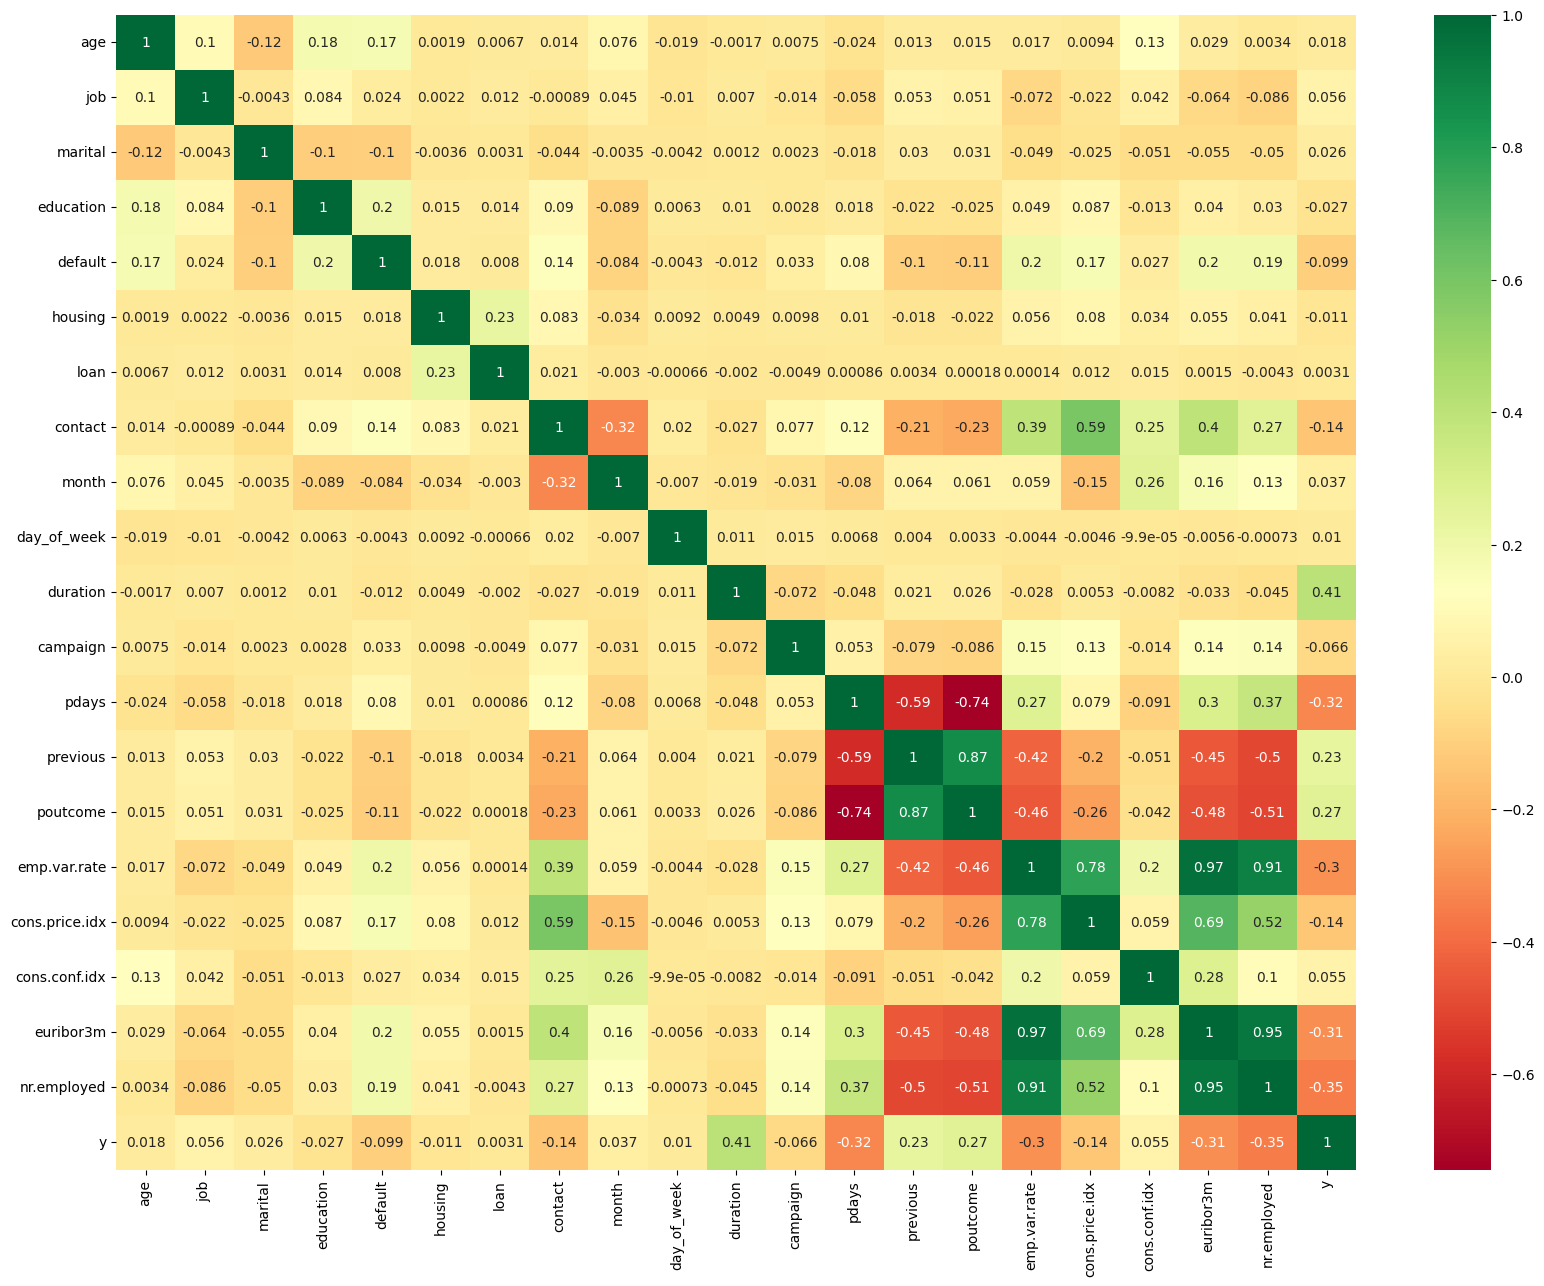

In [74]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(),annot=True, cmap='RdYlGn')

In [75]:
train = train.drop('previous',axis=1)
train = train.drop('emp.var.rate',axis=1)

<AxesSubplot: >

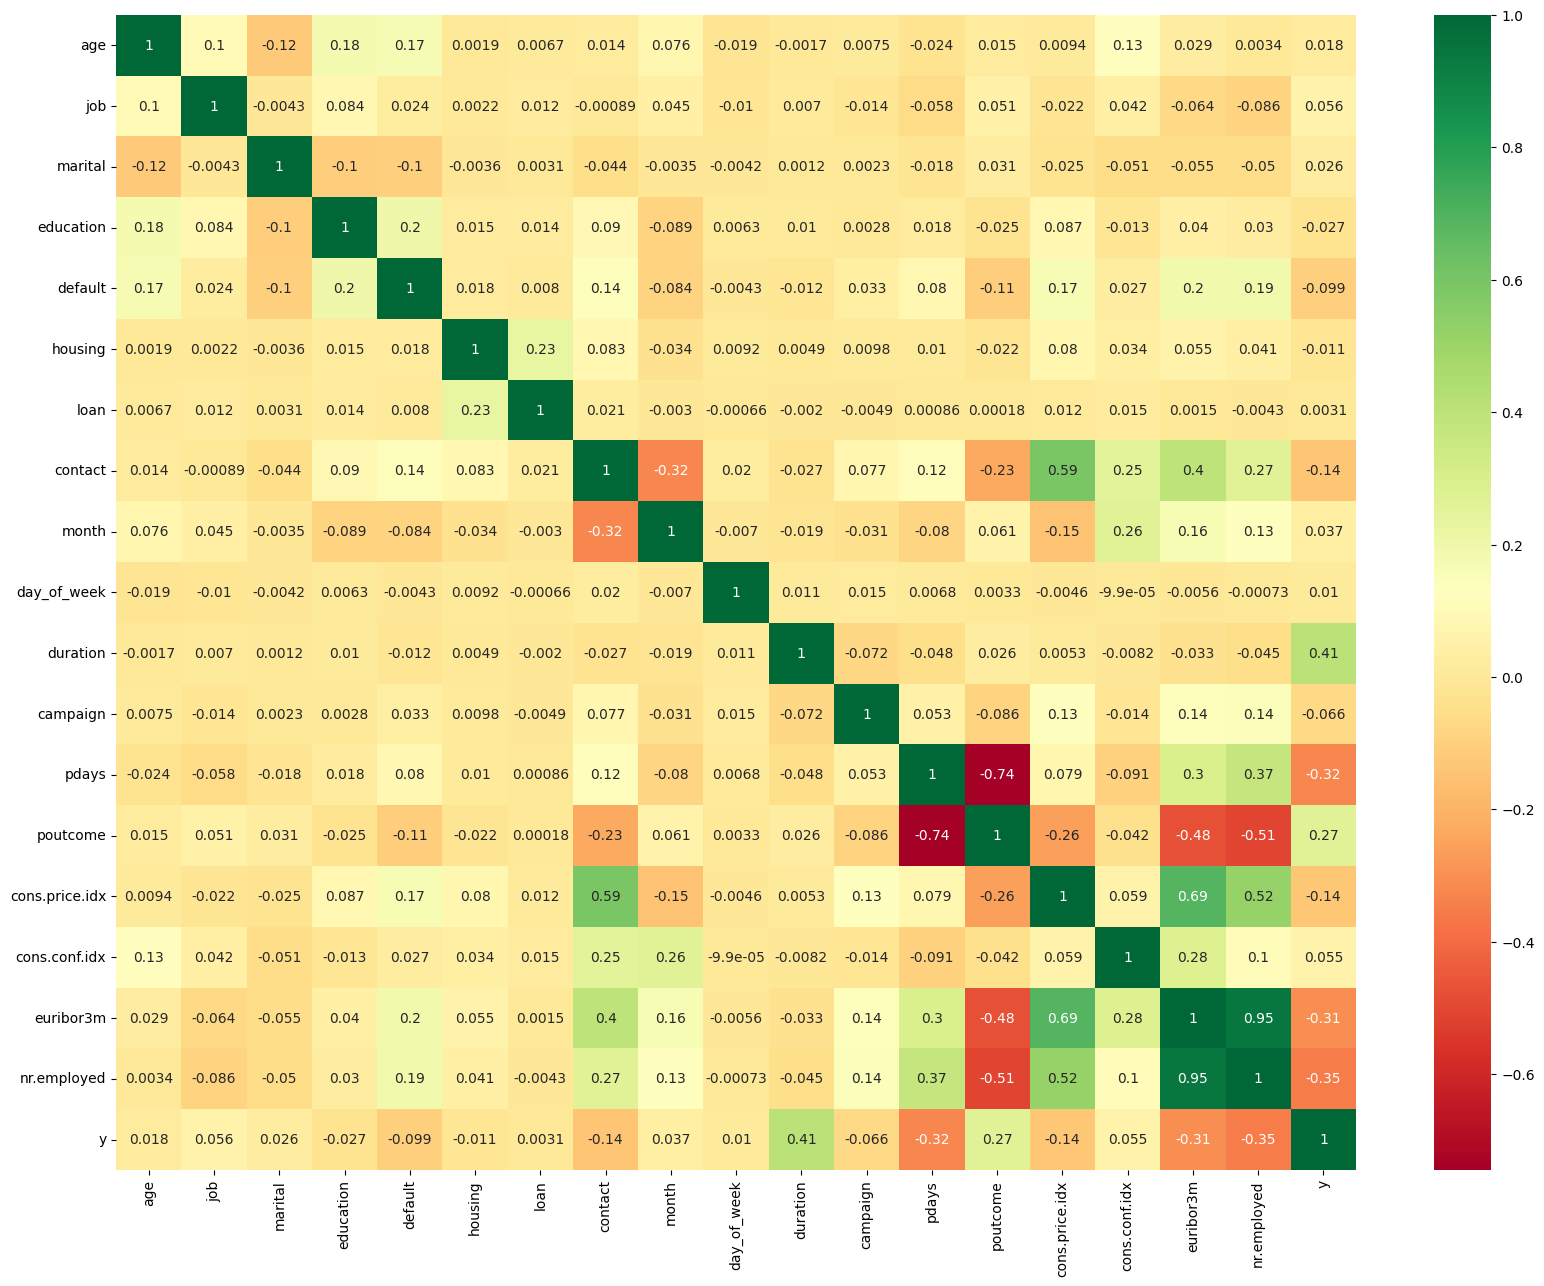

In [76]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(),annot=True, cmap='RdYlGn')

In [77]:
train = train.drop('nr.employed',axis=1)

<AxesSubplot: >

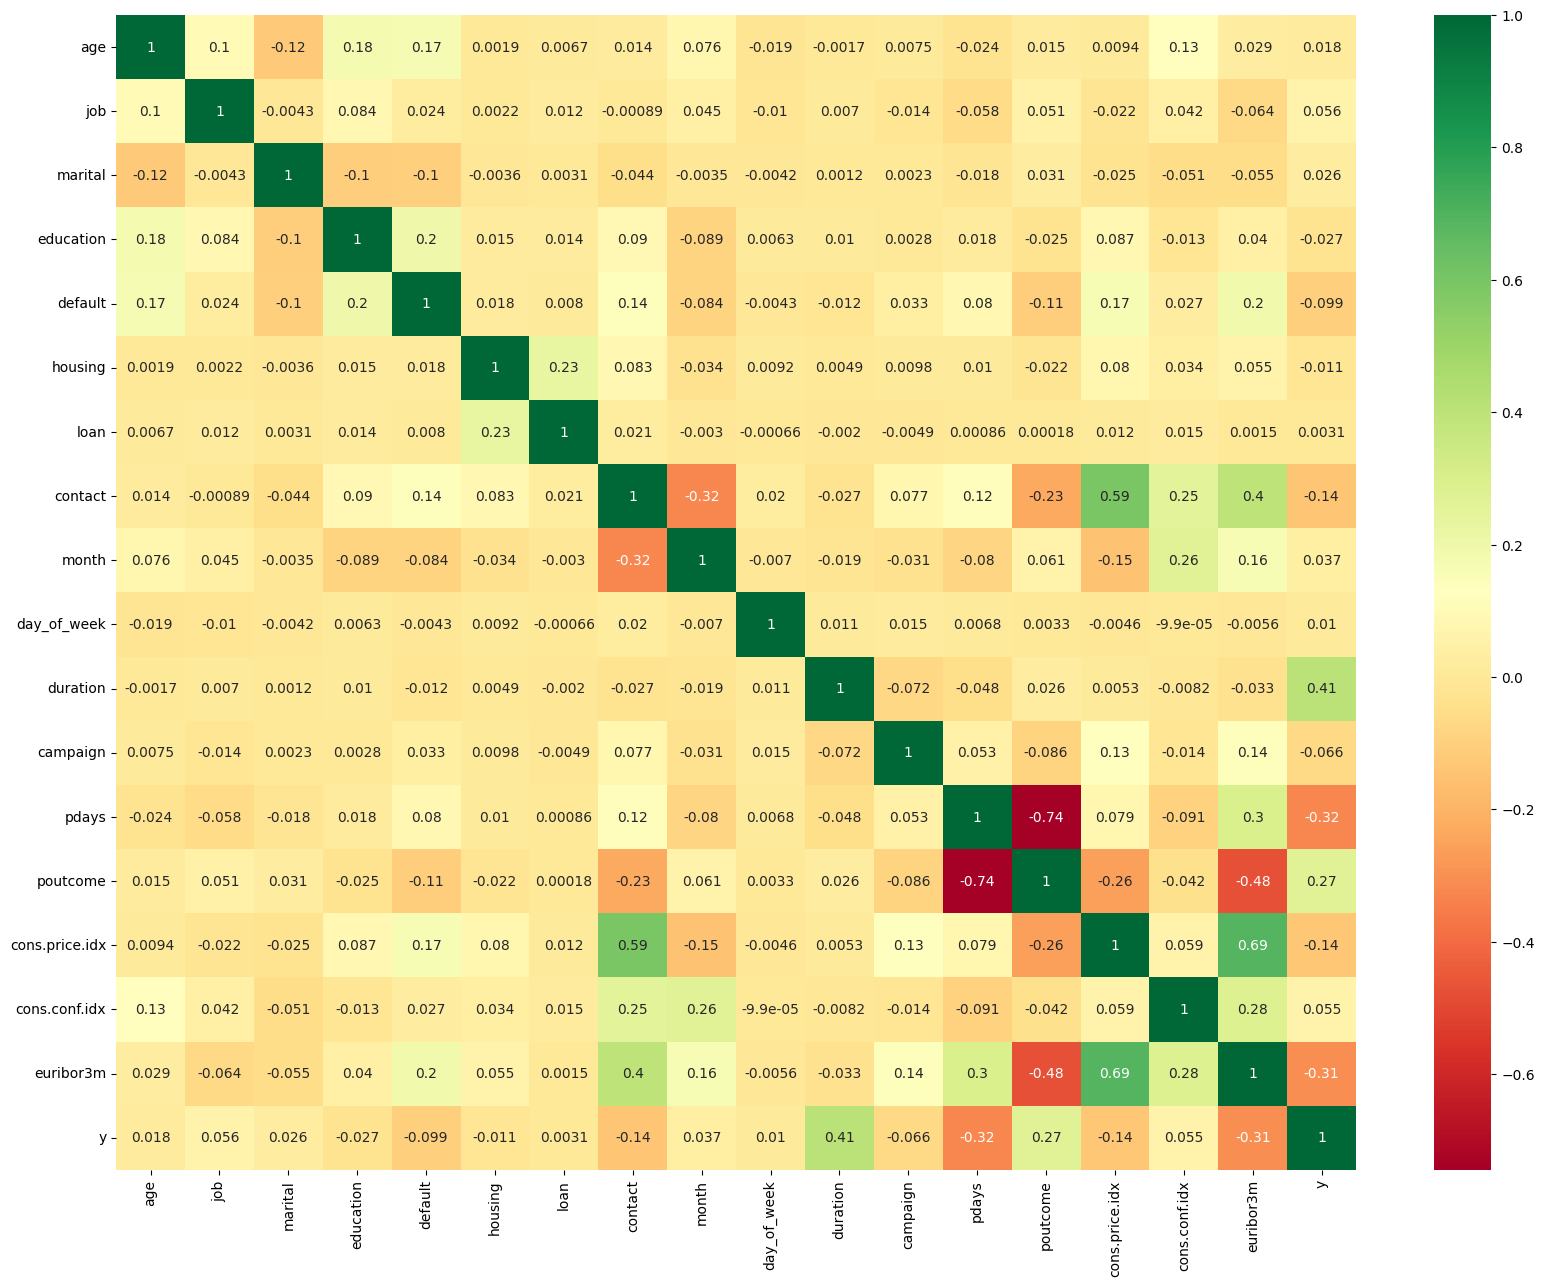

In [78]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(),annot=True, cmap='RdYlGn')

In [86]:
Targeted_feature = train["y"]

In [80]:
all_features = train.drop('y',axis=1)

In [81]:
all_features.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'],
      dtype='object')

In [82]:
col = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [3]:
all_features = pd.get_dummies(all_features,columns = col ,drop_first=True)

NameError: name 'pd' is not defined

In [84]:
all_features.columns

Index(['age', 'duration', 'campaign', 'pdays', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_1', 'job_2', 'job_3', 'job_4',
       'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'marital_1',
       'marital_2', 'marital_3', 'education_1', 'education_2', 'education_3',
       'education_4', 'education_5', 'education_6', 'education_7', 'default_1',
       'default_2', 'housing_1', 'housing_2', 'loan_1', 'loan_2', 'contact_1',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'poutcome_2', 'poutcome_3'],
      dtype='object')

In [2]:
x_train,x_test,y_train,y_test= train_test_split(all_features,Targeted_feature, test_size =0.3, random_state=42)

NameError: name 'train_test_split' is not defined

In [88]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28831, 49), (12357, 49), (28831,), (12357,))

In [90]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [1]:
pred_svm = model.predict(x_test)

NameError: name 'model' is not defined

In [9]:
accuracy_score(pred_svm, y_test)

NameError: name 'pred_svm' is not defined

In [ ]:
result = cross_val_score(model,all_features,Targeted_feature, cv=10, scoring='accuracy')

In [ ]:
result

In [ ]:
result.mean()

In [ ]:
y_pred = cross_val_predict(model,all_features,Targeted_feature, cv=10)

In [ ]:
sns.heatmap(confusion_matrix(Targeted_feature, y_pred), annot=True)